# Linear Regression model of Facebook Ads data 

###### AASHISH UPADHYAY

In [78]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Preprocessing

In [36]:
# importing dataset 

df = pd.read_excel("data.xlsx")

In [37]:
df.shape

(16834, 16)

In [38]:
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [39]:
# Extracting Facebook Ads data from the dataframe

df = df.loc[df.campaign_platform=="Facebook Ads"]

In [40]:
df.shape

(1733, 16)

In [41]:
df.columns

Index(['Date', 'product', 'phase', 'campaign_platform', 'campaign_type',
       'communication_medium', 'subchannel', 'audience_type', 'creative_type',
       'creative_name', 'device', 'age', 'spends', 'impressions', 'clicks',
       'link_clicks'],
      dtype='object')

In [42]:
# Deleting empty rows
df = df.dropna(how="any")

In [52]:
df = df.drop(["device"], axis=1)

In [53]:
df.shape

(1187, 15)

In [54]:
x = df.iloc[:,7:-1].values
y = df.iloc[:,-1].values

In [55]:
x.shape

(1187, 7)

In [56]:
y.shape

(1187,)

In [57]:
# Handling categorical data

le = LabelEncoder()

In [58]:
x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])
x[:,2] = le.fit_transform(x[:,2])
x[:,3] = le.fit_transform(x[:,3])

In [59]:
x.shape

(1187, 7)

In [60]:
x

array([[1, 0, 0, ..., 70.28, 730, 12],
       [1, 0, 0, ..., 7.66, 71, 1],
       [1, 1, 1, ..., 117.13, 638, 36],
       ...,
       [0, 1, 2, ..., 255.62, 1895, 30],
       [0, 1, 2, ..., 89.06, 764, 7],
       [0, 1, 2, ..., 24.35, 228, 11]], dtype=object)

In [61]:
ohe = OneHotEncoder(categorical_features=[0,1,2,3])

In [62]:
x = ohe.fit_transform(x).toarray()

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [63]:
df.columns

Index(['Date', 'product', 'phase', 'campaign_platform', 'campaign_type',
       'communication_medium', 'subchannel', 'audience_type', 'creative_type',
       'creative_name', 'age', 'spends', 'impressions', 'clicks',
       'link_clicks'],
      dtype='object')

In [64]:
df.creative_type.nunique()

2

In [65]:
x = x[:,[0,1,3,5,6,8,9,10,12,13,14]]

In [66]:
x.shape

(1187, 11)

In [67]:
y.shape

(1187,)

In [68]:
# splitting dataset ino training and test sets 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2 )

### Applying linear regression

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
lr.coef_

array([ 2.41692715e+00,  1.12566243e+00,  2.06947135e+00,  2.06947135e+00,
        2.22444342e+00,  4.59721742e+00,  9.40248548e-01,  6.43207607e-01,
       -6.33261367e-05, -1.31673685e-04,  4.28216726e-01])

### Evaluating the model 

In [73]:
# predicted values of link_clicks

y_pred = lr.predict(x_test)

In [76]:
# mean squared error

mean_squared_error(y_test, y_pred)

37.26044051322461

In [75]:
#mean absolute error

mean_absolute_error(y_test, y_pred)

3.7629330799484575

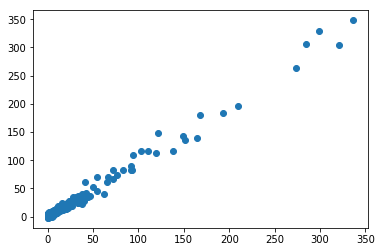

In [77]:
plt.scatter(y_test,y_pred)